# Linear Regression

Linear regression is a technique for modelling the relationship between one or more predictor (or independent) variables and one or more response (or dependent) variables. 

Our goal using linear regression is to explain the relationship using a linear equation of the form:

$Y = m·X +c$

## Using scipy

In [42]:
# Using scipy
import pandas as pd
from scipy.stats import linregress

auto = pd.read_csv('data/auto-mpg.csv')
display(auto.head())
display(auto.shape)
slope, intercept, r_value, p_value, std_err = linregress(auto.acceleration, auto.mpg)

print(slope, intercept, r_value, p_value, std_err)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress
checkPValue = lambda p,threshold=0.05: "--> Null(H0) hypotesis rejected" if p < threshold else "--> We cannot reject the null hypotesis"
# Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic.
print(checkPValue(p_value))





,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


(398, 8)

1.1912045293502274 4.9697930042539085 0.4202889121016507 1.8230915350787203e-18 0.12923643283101396
--> Null(H0) hypotesis rejected


[ 8.  24.8]


Text(0, 0.5, 'mpg')

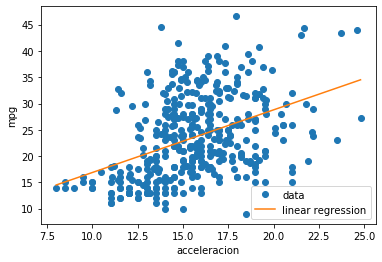

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# The data
plt.plot(auto.acceleration, auto.mpg,'o')
# The line
x = np.linspace(auto.acceleration.min(),auto.acceleration.max(),2)
print(x)
y = slope*x+intercept
plt.plot(x,y)

# The legend
plt.legend(["data","linear regression"])
plt.xlabel("acceleracion")
plt.ylabel("mpg")

In [11]:
df = pd.DataFrame({
    "acc":auto.acceleration, 
    "real_mpg":auto.mpg,
    "predicted_mpg": slope*auto.acceleration+intercept
})

# https://es.wikipedia.org/wiki/Coeficiente_de_determinaci%C3%B3n

display(df)
# https://en.wikipedia.org/wiki/Mean_squared_error
mse = ((df.real_mpg - df.predicted_mpg)**2).sum() / df.shape[0] 
print(mse)

,acc,real_mpg,predicted_mpg
0,12.0,18.0,19.264247
1,11.5,15.0,18.668645
2,11.0,18.0,18.073043
3,12.0,16.0,19.264247
4,10.5,17.0,17.477441
...,...,...,...
393,15.6,27.0,23.552584
394,24.6,44.0,34.273424
395,11.6,32.0,18.787766
396,18.6,28.0,27.126197


50.172194407701355


0.4976304786902152 0.019135405436250252 5.4141749484416614e-71
--> Null(H0) hypotesis rejected


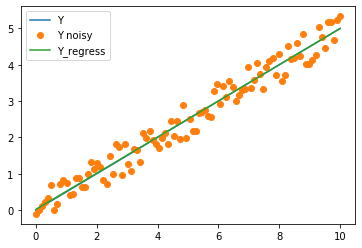

In [31]:
import numpy as np

#s = np.random.randn(100)

x = np.linspace(0,10,100)
y = (0.5*x)
y_noise = y + np.random.random(len(x))-0.5
plt.plot(x,y)
plt.plot(x,y_noise,'o')

slope, intercept, r_value, p_value, std_err = linregress(x,  y_noise)
print(slope, intercept, p_value)
y_predicted = slope*x+intercept
plt.plot(x,y_predicted)

plt.legend(["Y","Y noisy","Y_regress"])
print(checkPValue(p_value))

## Using StatsModels

$$ y_{i}=\beta _{0}+\beta _{1}x_{i1}+\cdots +\beta _{p}x_{ip}+\varepsilon _{i} $$

In [34]:
import statsmodels.api as sm

#X = sm.add_constant(auto.acceleration) # We must add the intercept using the add_constant function

# Here, we are not limited to only one predictor variable. 
X = sm.add_constant(auto[['cylinders', 'weight', 'acceleration']])

# What we want to predict
Y = auto.mpg

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

# See the model summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     306.7
Date:                Thu, 23 Apr 2020   Prob (F-statistic):          1.14e-102
Time:                        13:28:15   Log-Likelihood:                -1142.9
No. Observations:                 398   AIC:                             2294.
Df Residuals:                     394   BIC:                             2310.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.3811      1.960     21.627      0.000      38.528      46.234
cylinders       -0.4827      0.302     -1.599      0.111      -1.076       0.111
weight          -0.0065      0.001    -11.342      0.000      -0.008      -0.005
acceleration     0.2034      0.091      2.236      0.026       0.025       0.382
==============================================================================
Omnibus:                       34.469   Durbin-Watson:                   0.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.516
Skew:                           0.654   Prob(JB):                     1.31e-10
Kurtosis:                       4.016   Cond. No.                     2.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
df = auto[['cylinders', 'weight', 'acceleration']]
df["predicted"] = model.predict(sm.add_constant(df)) 
df["mpg"] = auto["mpg"]

df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,cylinders,weight,acceleration,predicted,mpg
0,8,3504,12.0,18.075099,18.0
1,8,3693,11.5,16.738975,15.0
2,8,3436,11.0,18.315779,18.0
3,8,3433,12.0,18.538816,16.0
4,8,3449,10.5,18.129152,17.0
...,...,...,...,...,...
393,4,2790,15.6,25.401728,27.0
394,4,2130,24.6,31.543328,44.0
395,4,2295,11.6,27.820915,32.0
396,4,2625,18.6,27.089711,28.0


In [45]:
4*-0.4827 +2720*-0.0065 + 19.4 * 0.2034 + 42.3811

26.716260000000002

In [ ]:
y = -0.4827*x1 -0.0065*x2 + 0.2034*x3 + 42.3811